<a href="https://colab.research.google.com/github/code-pilgrim/hw/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:
https://github.com/the-codingschool/AWS-Part-I-Day-7-Solutions/blob/main/TRAIN%20AWS%20Part%20I%20Day%207%20Lab%20Notebook%20ADVANCED%20%5BSOLUTIONS%5D.ipynb

https://www.youtube.com/watch?v=L3PC3FkqGUA

In [45]:
from sklearn import datasets, model_selection, metrics

In [46]:
from sklearn.datasets import load_iris

In [47]:
iris = load_iris()

In [48]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [49]:
iris.data.shape

(150, 4)

In [50]:
iris.target.shape

(150,)

In [51]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [52]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [53]:
import pandas as pd

In [54]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [55]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [56]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [57]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
iris_df['species'].describe()

,species
count,150
unique,3
top,setosa
freq,50


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
from sklearn.model_selection import KFold

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
k_range = range(1,31)

In [65]:
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(estimator=knn, X=iris.data, y=iris.target, cv=10)

In [66]:
scores

array([0.93333333, 0.93333333, 1.        , 0.93333333, 1.        ,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [67]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 95.33%


In [68]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 4.27%


In [69]:
from sklearn.model_selection import GridSearchCV
import numpy as np
gs = {'n_neighbors' : np.arange(1,31)}

In [70]:
X_train.shape

(112, 4)

In [71]:
X_test.shape

(38, 4)

In [72]:
knn_param_search = GridSearchCV(knn,gs,cv=10)

In [73]:
knn

KNeighborsClassifier(n_neighbors=30)

ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

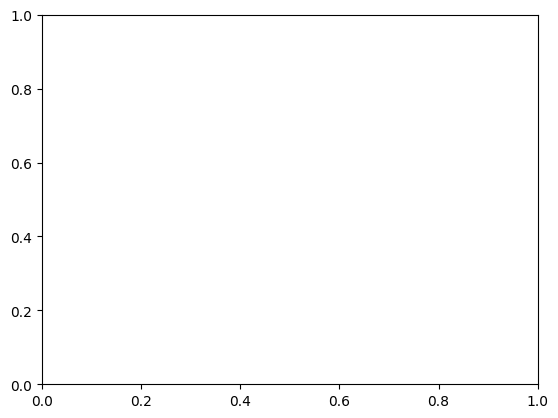

In [74]:
import matplotlib.pyplot as plt
line = plt.plot(k,scores)